# Automobile Dataset

In [551]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [552]:
data=pd.read_csv("imports-85.csv")

In [553]:
pd.set_option('display.max_columns',100)
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [554]:
#assigning column names
data.columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
    'wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
    'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [555]:
#replace '?' with NaN
data.replace(to_replace='?',value=np.nan,inplace=True)

In [556]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [557]:
data.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [558]:
#converting data types to float
data['bore']=data['bore'].astype(float)
data['stroke']=data['stroke'].astype(float)
data['price']=data['price'].astype(float)
data['normalized-losses']=data['normalized-losses'].astype(float)
data['horsepower']=data['horsepower'].astype(float)
data['peak-rpm']=data['peak-rpm'].astype(float)

In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    164 non-null float64
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         202 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    204 non-null float64
horsepower           202 non-

In [560]:
data['normalized-losses'].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [561]:
#filling null values
data['normalized-losses']=data['normalized-losses'].fillna(data['normalized-losses'].mode()[0])
data['num-of-doors']=data['num-of-doors'].fillna(data['num-of-doors'].mode()[0])
data['bore']=data['bore'].fillna(data['bore'].mean())
data['stroke']=data['stroke'].fillna(data['stroke'].mean())
data['horsepower']=data['horsepower'].fillna(data['horsepower'].mode()[0])
data['peak-rpm']=data['peak-rpm'].fillna(data['peak-rpm'].mode()[0])
data['price']=data['price'].fillna(int(data['price'].mean()))

In [562]:
data['horsepower'].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,  85.,
       114., 162., 134., 106.])

In [563]:
data['peak-rpm'].unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
       5250., 4900., 4400., 6600., 5300.])

In [564]:
data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [565]:
data['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [566]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [567]:
data['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [568]:
data['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [569]:
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [570]:
#Since "4wd" and "fwd" are the same things, so replacing "4wd" with "fwd"
data['drive-wheels']=data['drive-wheels'].replace('4wd','fwd')

In [571]:
data['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [572]:
data['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [573]:
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [574]:
data['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

## Filteration of columns

It is not always necessary that all the features of the data provided has an effect on the feature to be predicted. In such cases, taking those features for output prediction is not so likely, that's why we need to filter out the unnecessary features.
This can be done by plotting the relation of each feature with price and then by analysing it.

#### Graph for all continuous features vs Price.

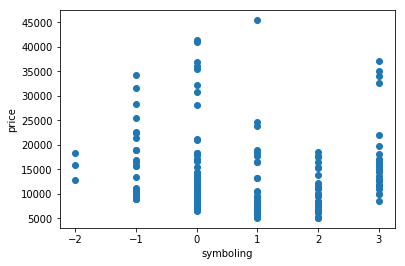

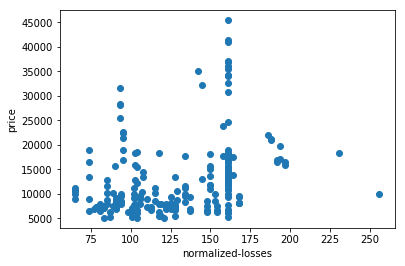

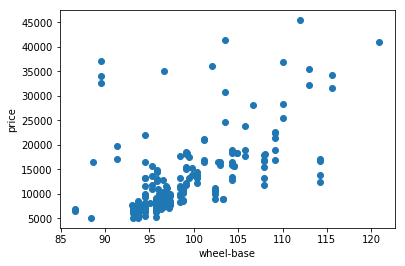

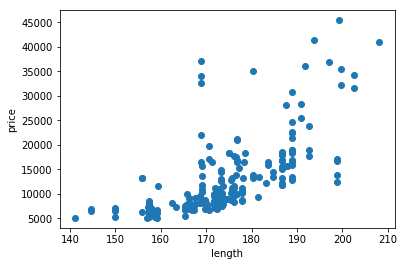

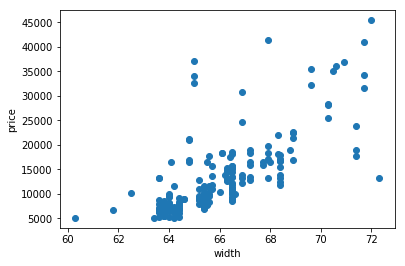

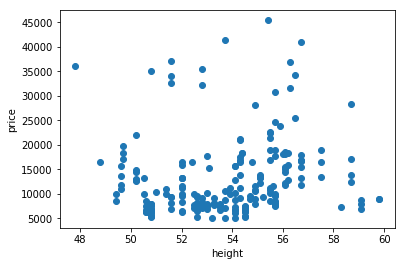

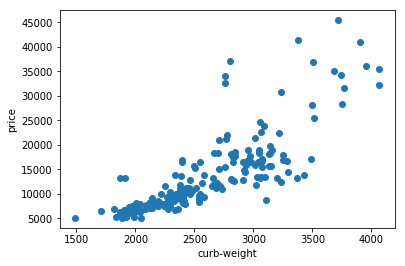

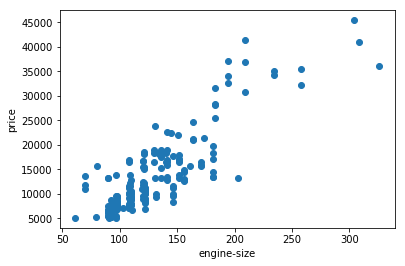

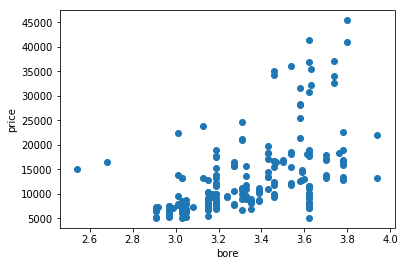

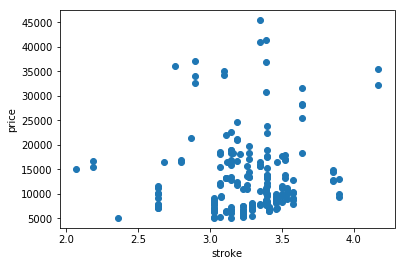

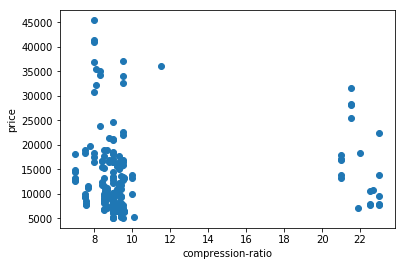

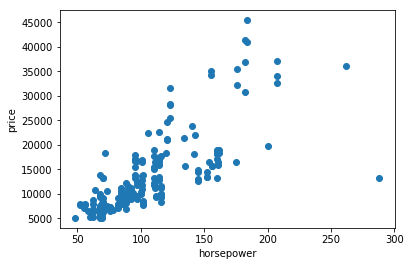

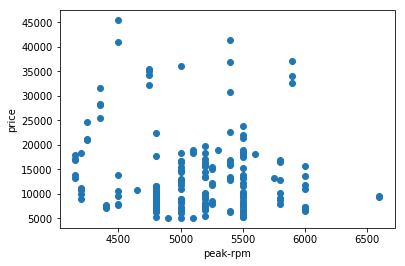

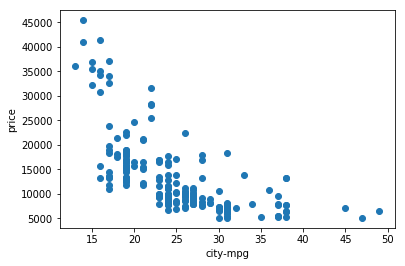

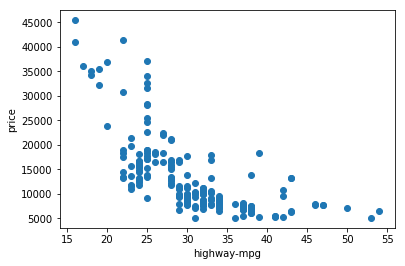

In [575]:
for i in data.columns:
    if(i!="price"):
        if(type(data[i][0])!=str):
            fig=plt.figure()
            plt.scatter(data[i],data['price'])
            plt.xlabel(i)
            plt.ylabel('price')

From the above graphs we conclude that all the continuous features are responsible for the prediction of price . 
Hence,we must include them all.

#### Graphs For all categorical features vs Price.

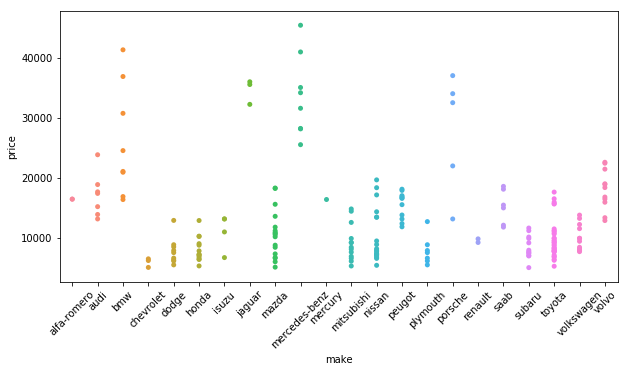

In [576]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,size=10)
sb.stripplot(x=data['make'], y=data['price']);
#different makes are giving different prices so we must include make

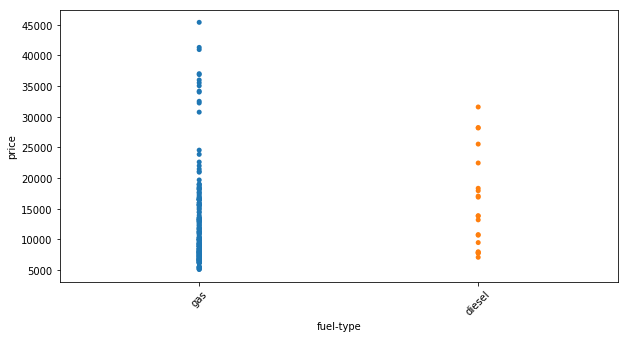

In [577]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,size=10)
sb.stripplot(x=data['fuel-type'], y=data['price']);
#include it

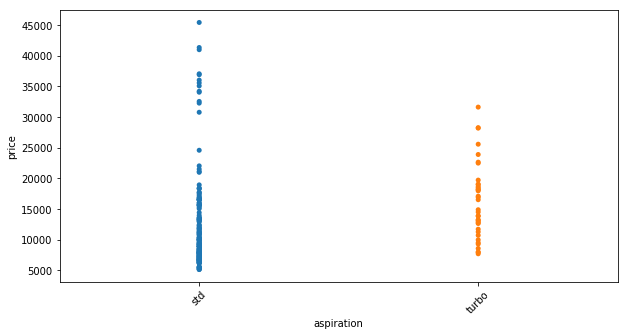

In [578]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,size=10)
sb.stripplot(x=data['aspiration'], y=data['price']);
#include it

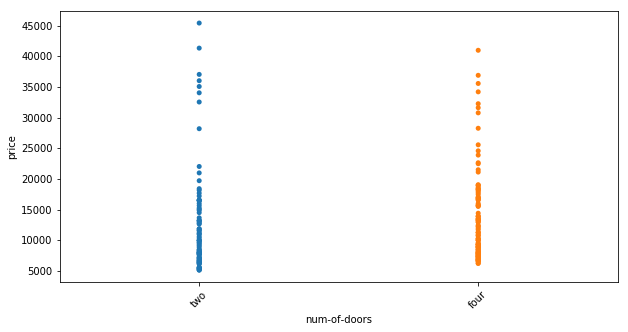

In [579]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,size=10)
sb.stripplot(x=data['num-of-doors'], y=data['price']);
#we are getting the same prices for both the values of the feature "num-of-doors", so we can avoid it.

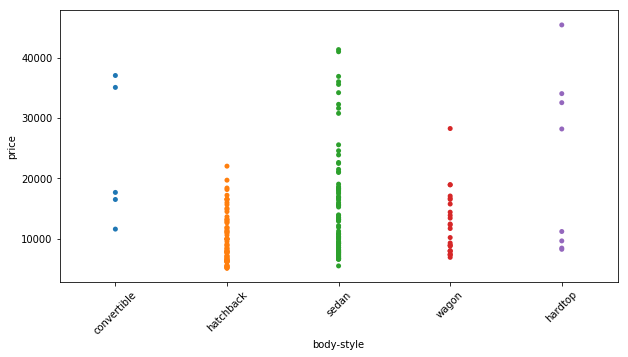

In [580]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,size=10)
sb.stripplot(x=data['body-style'], y=data['price']);
#include it

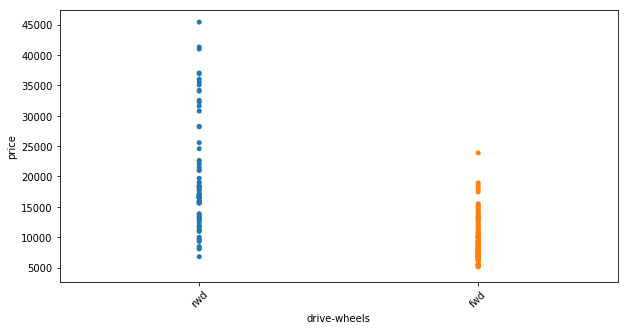

In [581]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,size=10)
sb.stripplot(x=data['drive-wheels'], y=data['price']);
#include it

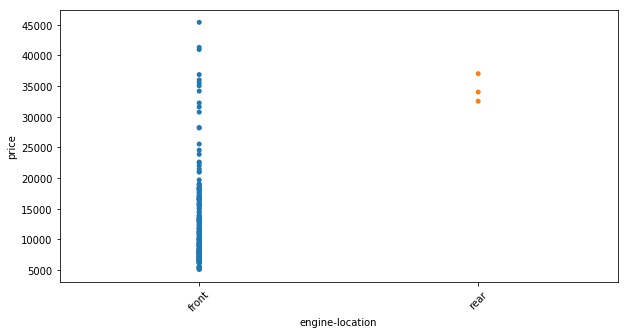

In [582]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,size=10)
sb.stripplot(x=data['engine-location'], y=data['price']);
#there are not so many automobile with "rear" engine-location, so we can avoid it. 

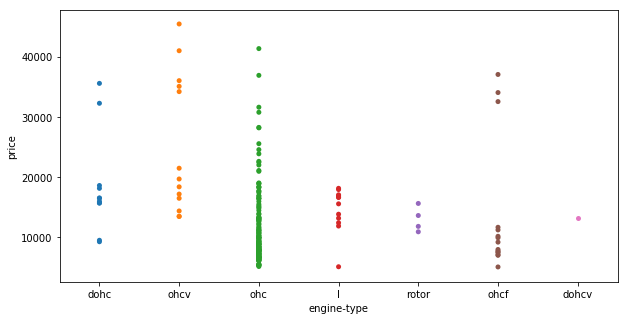

In [583]:
plt.figure(figsize=(10,5))
sb.stripplot(data['engine-type'],data['price'])
#include it

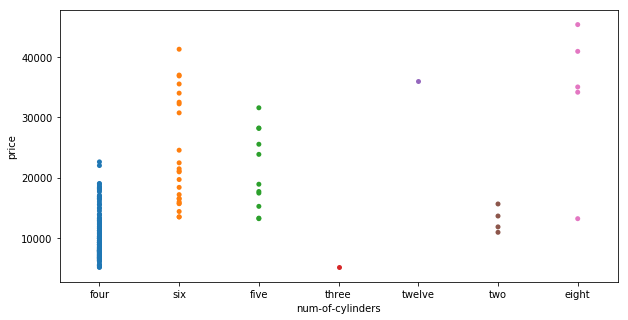

In [584]:
plt.figure(figsize=(10,5))
sb.stripplot(data['num-of-cylinders'],data['price'])
#include it

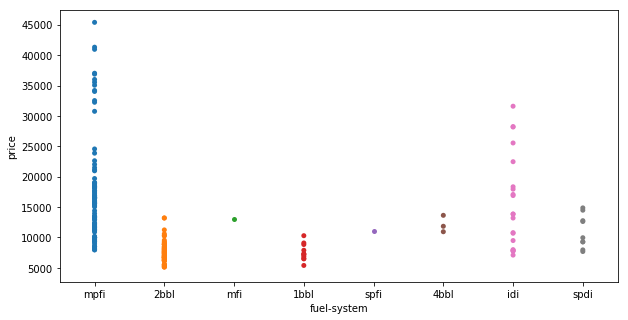

In [585]:
plt.figure(figsize=(10,5))
sb.stripplot(data['fuel-system'],data['price'])
#include it

From the above graphs, it has been concluded that the features "engine-location" and "num-of-doors" doesn't plays any role in the prediction of Price.So , we must exclude them.

## Checking for correlation between the predictors

###### For continuous features

In [586]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.443281,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,-0.135712,0.007463,-0.177413,0.068894,0.278328,-0.030557,0.039598,-0.083135
normalized-losses,0.443281,1.000000,0.044378,0.149684,0.207762,-0.345763,0.254055,0.290499,0.071758,0.108450,-0.098170,0.353705,0.197856,-0.336603,-0.299516,0.316906
wheel-base,-0.525095,0.044378,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,0.496912,0.147856,0.249199,0.358515,-0.367908,-0.479633,-0.552897,0.587608
length,-0.356792,0.149684,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,0.608241,0.126713,0.157913,0.549142,-0.283743,-0.673251,-0.706635,0.683373
width,-0.227799,0.207762,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,0.562663,0.177086,0.180287,0.638817,-0.218447,-0.647177,-0.681169,0.730129
height,-0.533078,-0.345763,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,0.178237,-0.075251,0.261036,-0.105779,-0.328433,-0.055659,-0.113995,0.136125
curb-weight,-0.229281,0.254055,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,0.648965,0.170018,0.151372,0.748612,-0.266088,-0.758238,-0.798088,0.820831
engine-size,-0.107229,0.290499,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,0.584069,0.205242,0.029083,0.806334,-0.242880,-0.654101,-0.677775,0.861753
bore,-0.135712,0.071758,0.496912,0.608241,0.562663,0.178237,0.648965,0.584069,1.000000,-0.051692,0.005949,0.569049,-0.249924,-0.583781,-0.586361,0.532562
stroke,0.007463,0.108450,0.147856,0.126713,0.177086,-0.075251,0.170018,0.205242,-0.051692,1.000000,0.185050,0.071738,-0.053430,-0.048697,-0.049536,0.083115


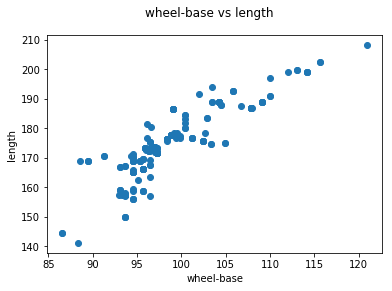

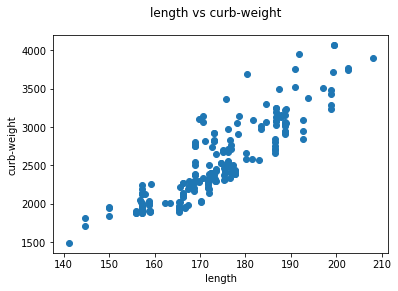

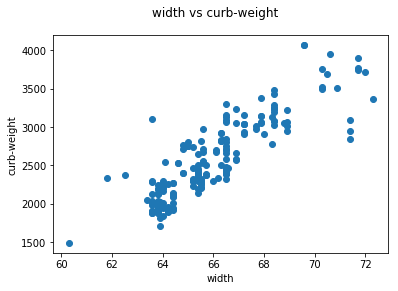

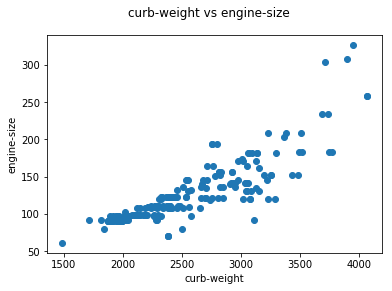

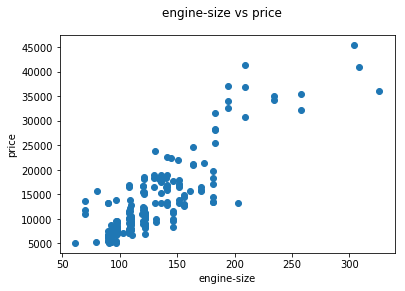

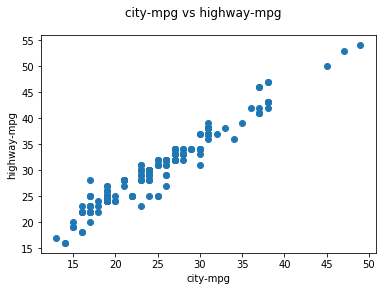

In [587]:
cor=data.corr()
for i in cor.index:
    ch=0
    for j in cor[i].index:
        if(i==j):
            ch=1
        elif(ch==0):
            continue
        elif(abs(cor[i][j])>=0.85):
            fig=plt.figure()
            plt.scatter(data[i],data[j])
            fig.suptitle(i+' vs '+j)
            plt.xlabel(i)
            plt.ylabel(j)

The above graphs shows the relation between the correlated predictors.From all of the above pairs,"length" ,"width" ,"engine-size" ,"city-mpg" has been chosen to be excluded from the model.

###### For categorical features

C:\Users\Shubham\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


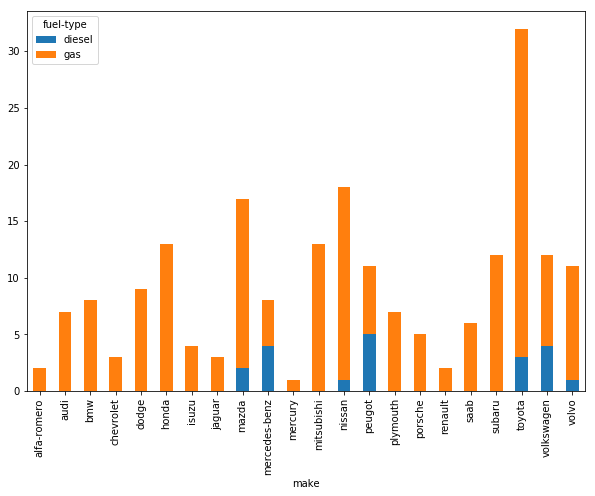

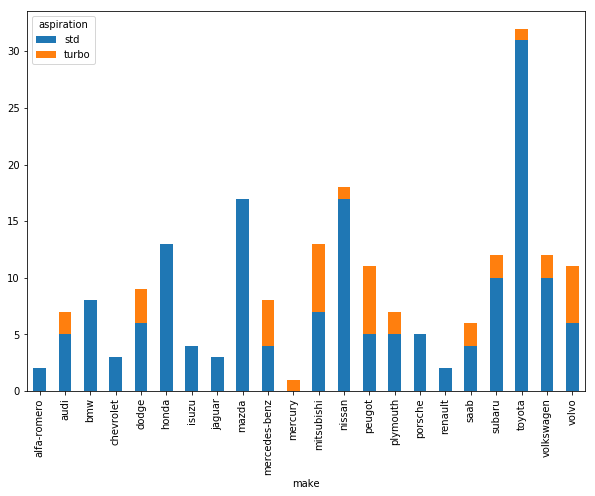

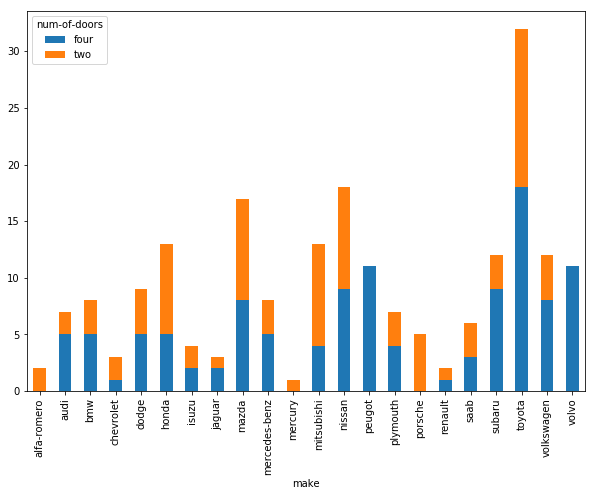

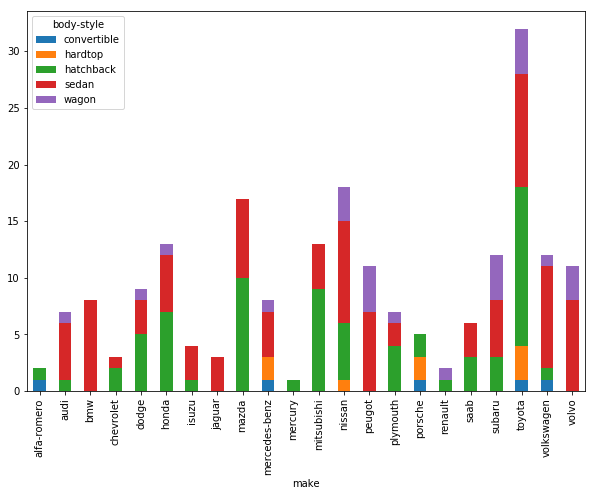

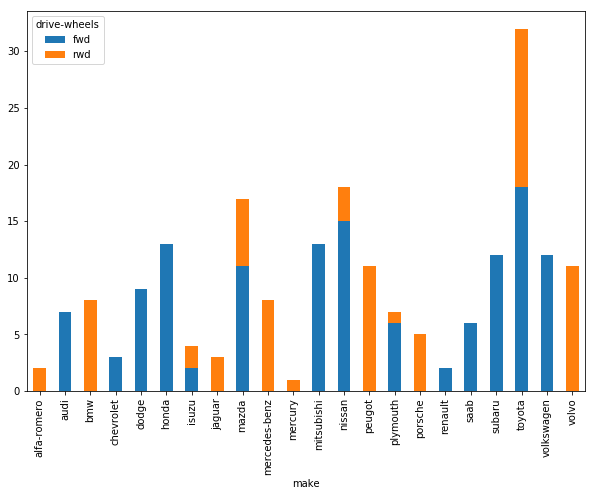

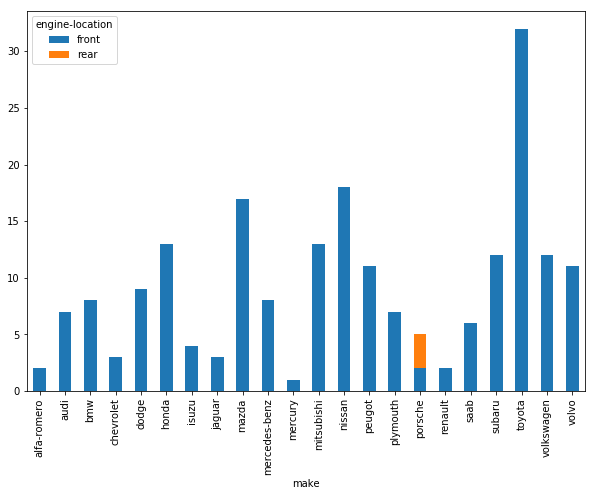

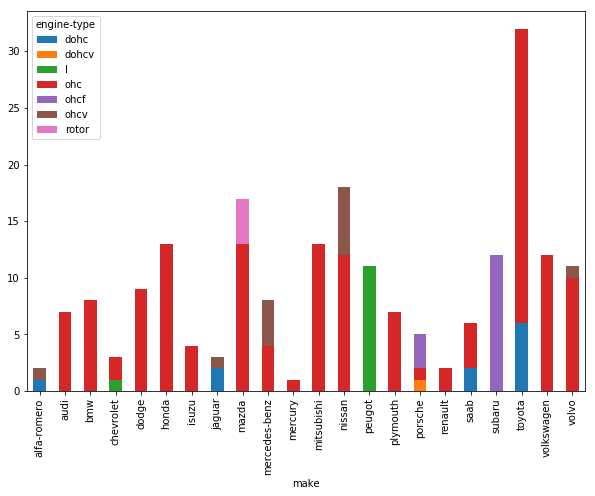

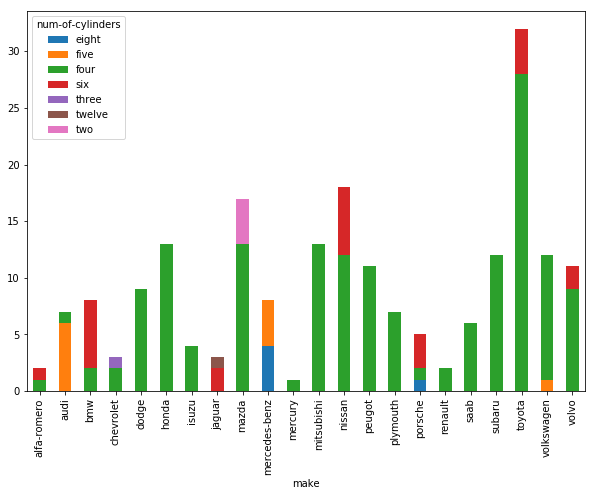

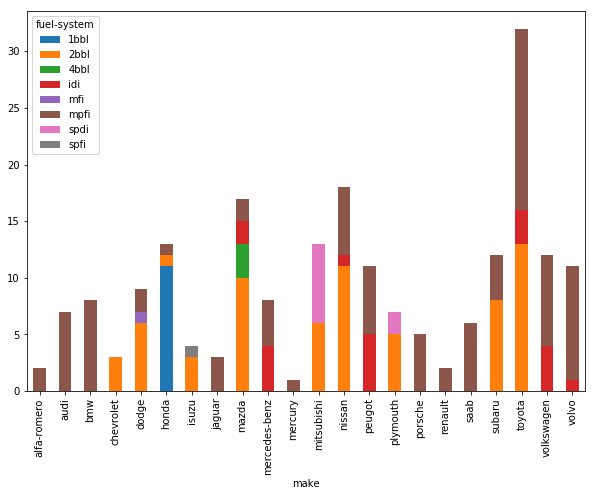

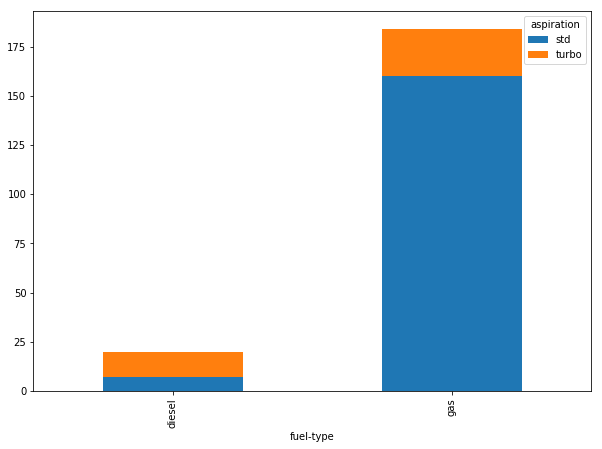

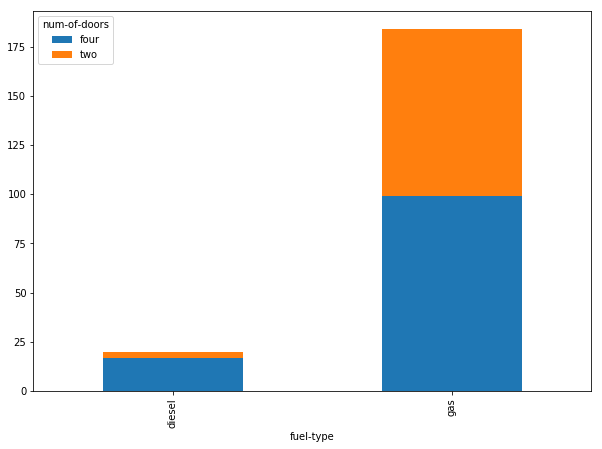

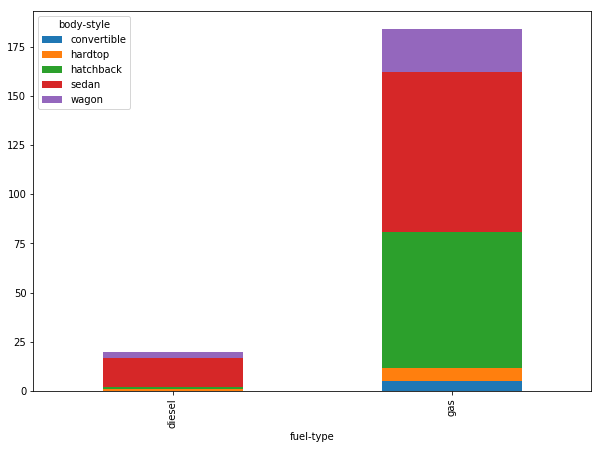

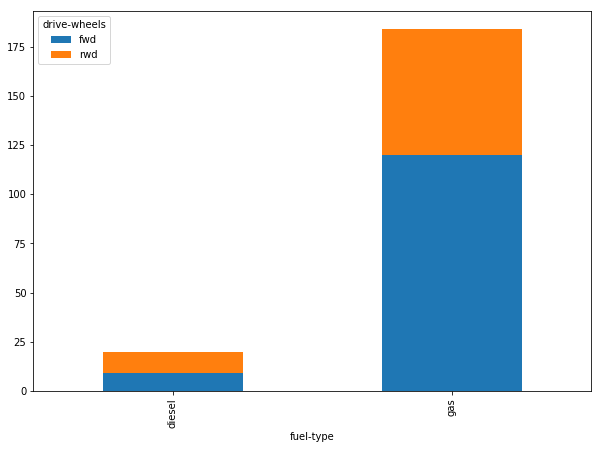

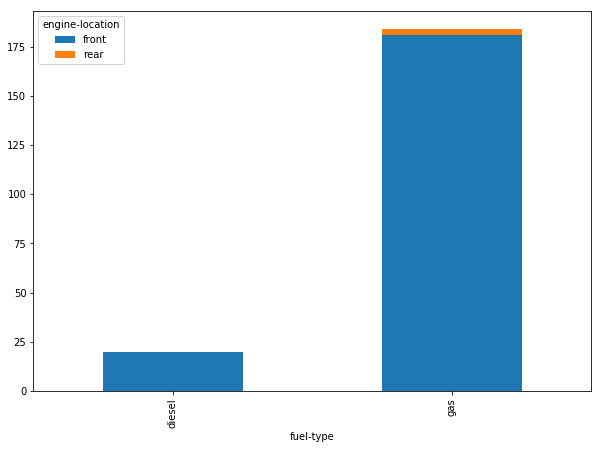

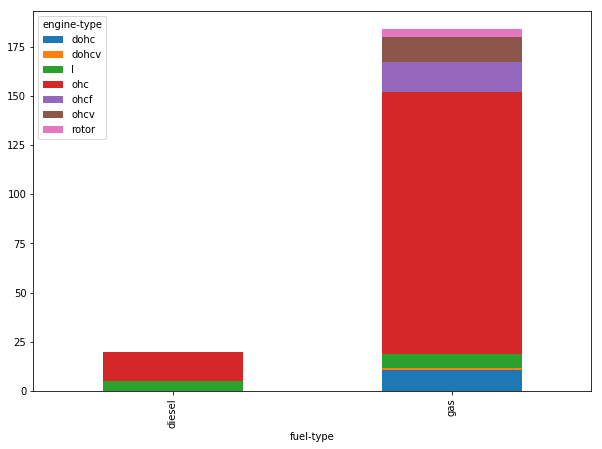

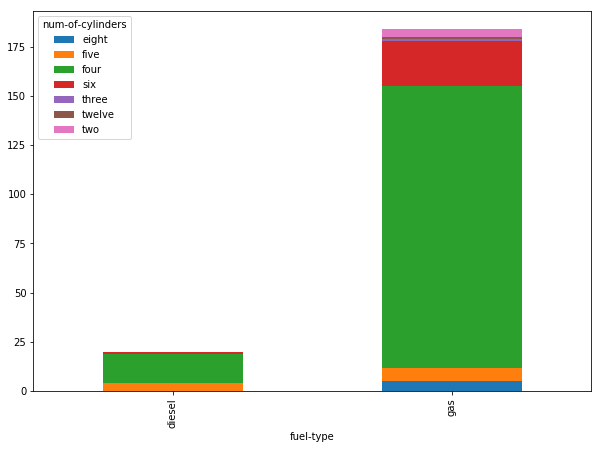

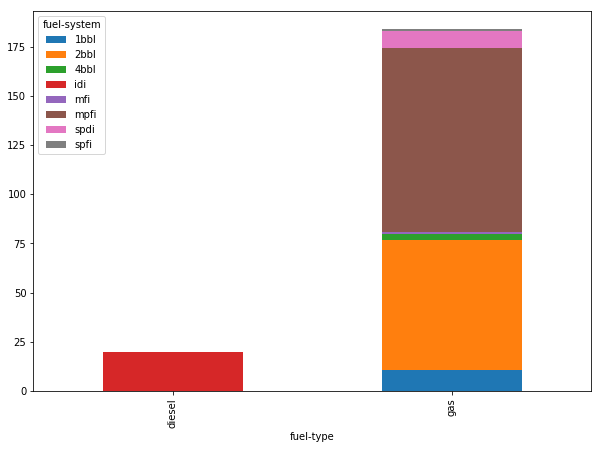

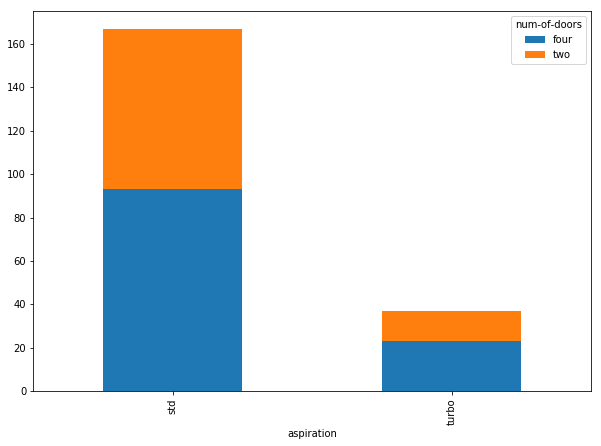

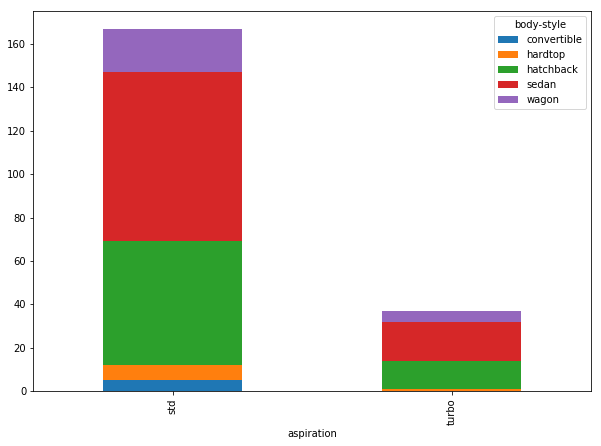

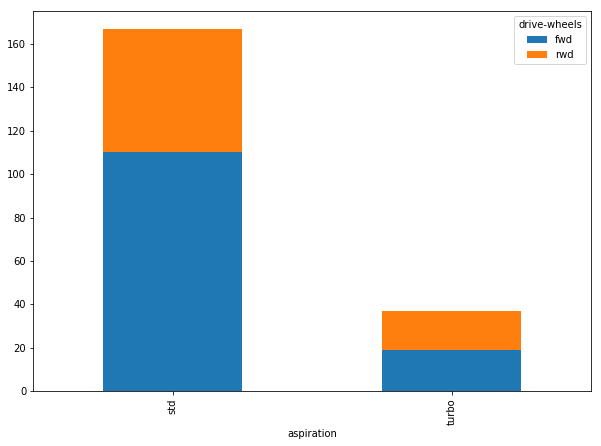

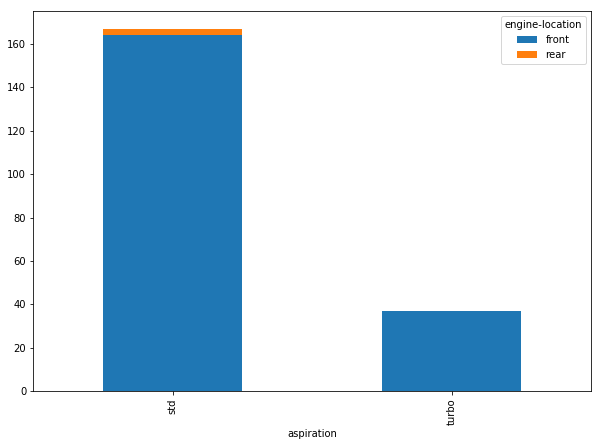

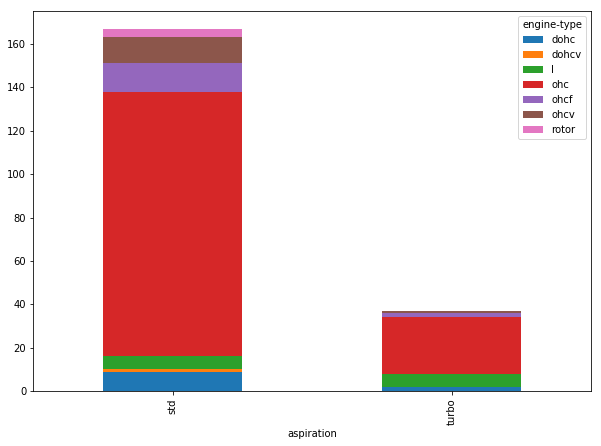

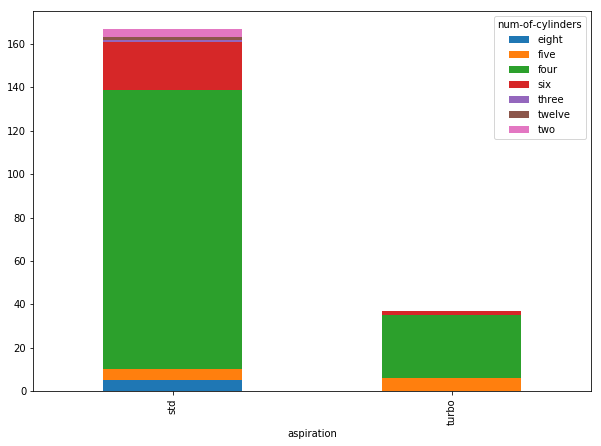

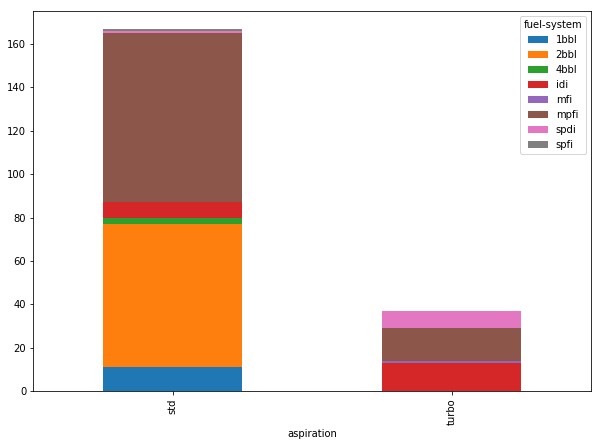

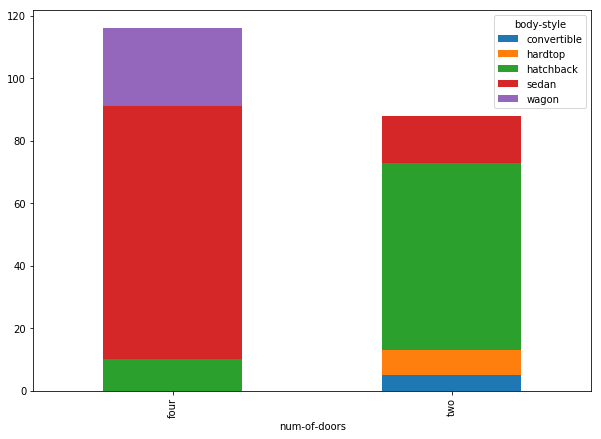

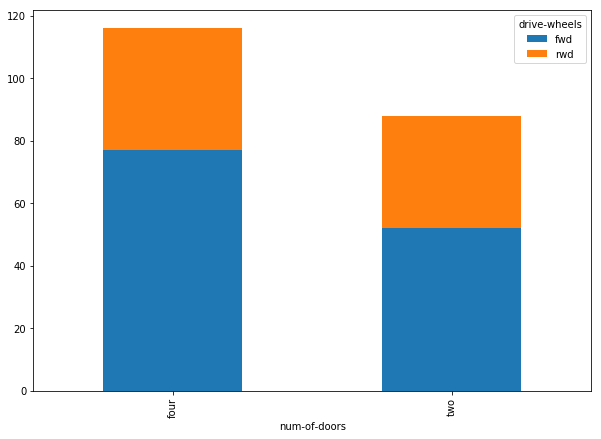

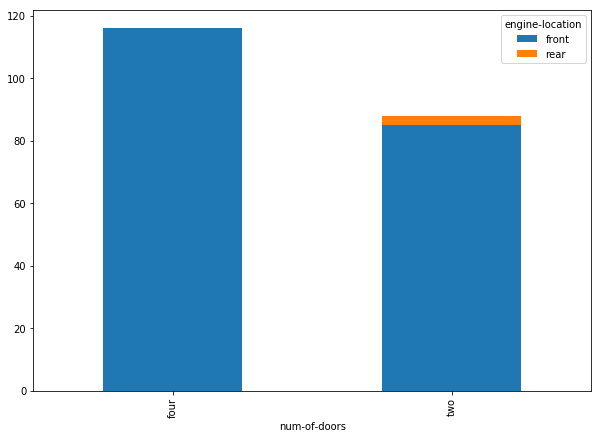

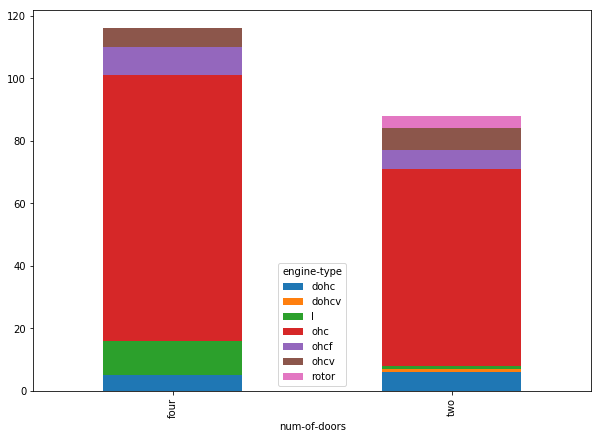

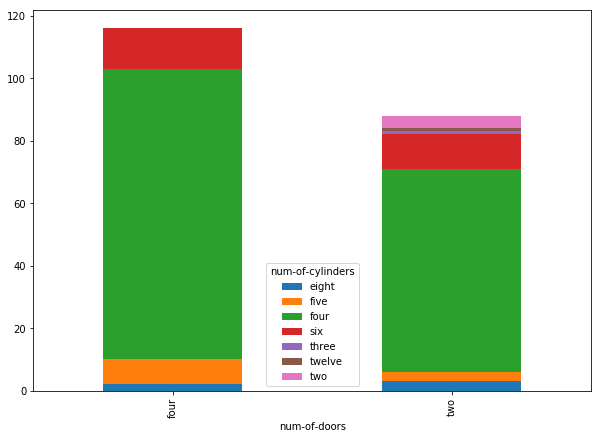

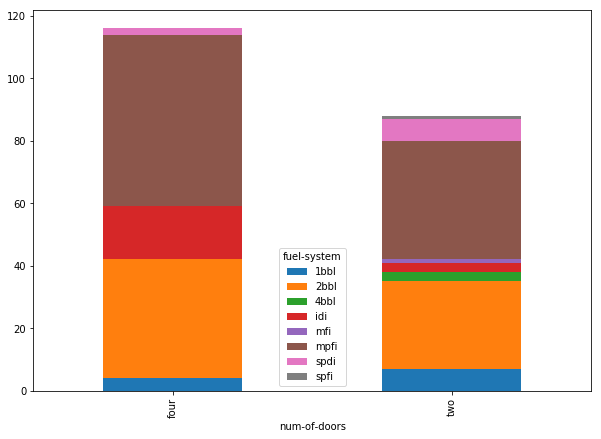

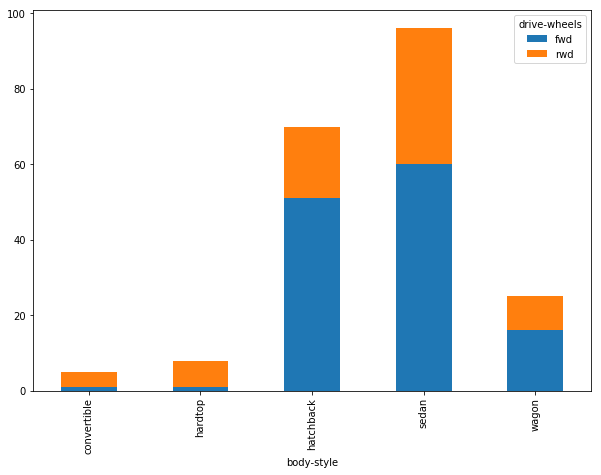

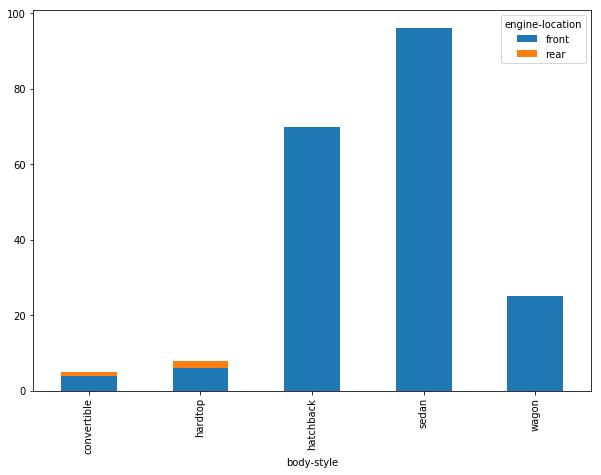

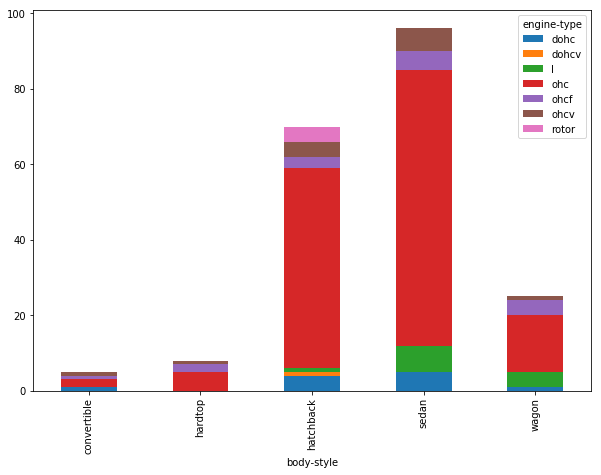

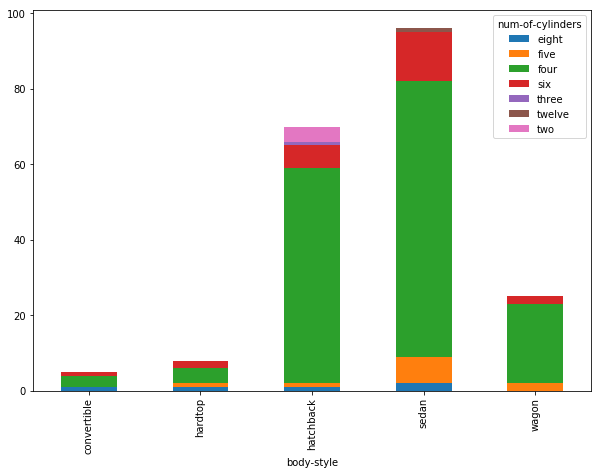

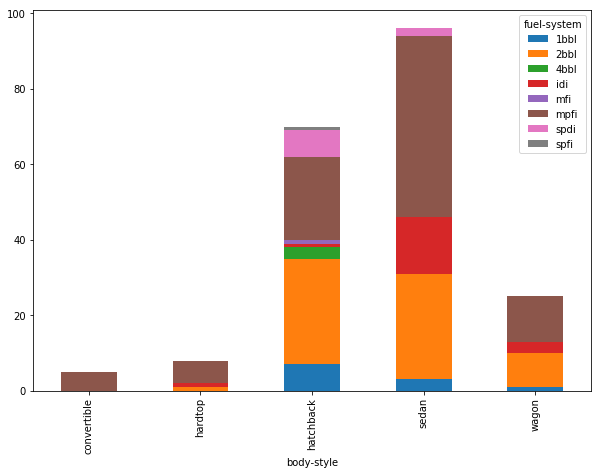

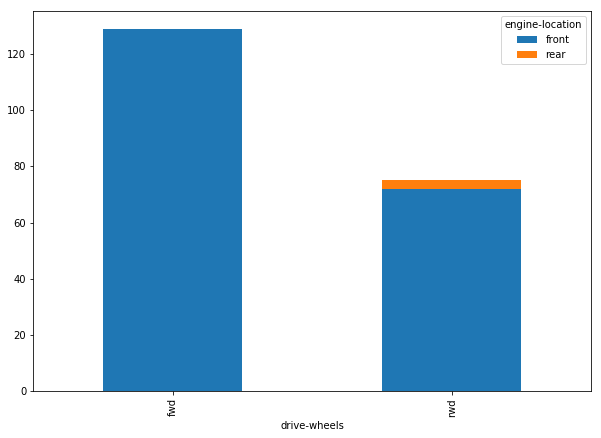

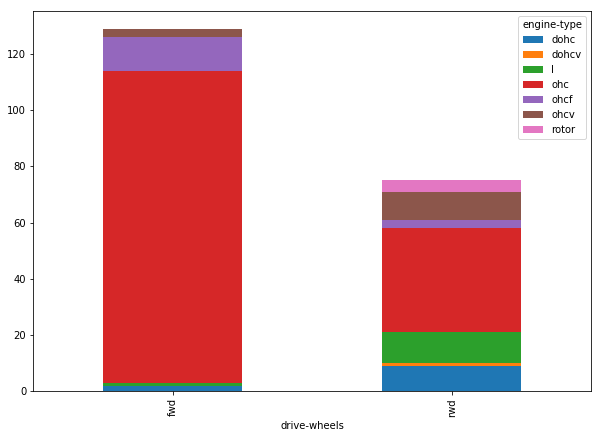

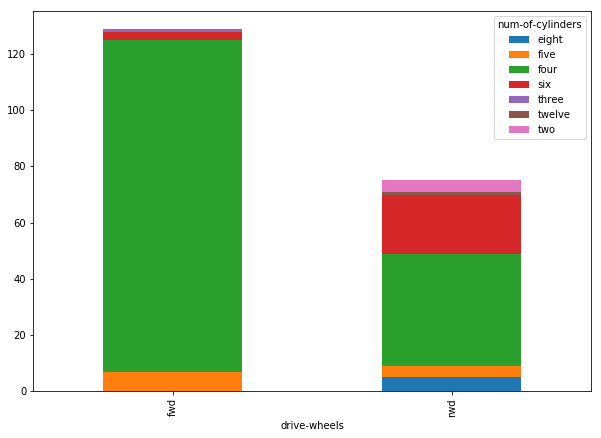

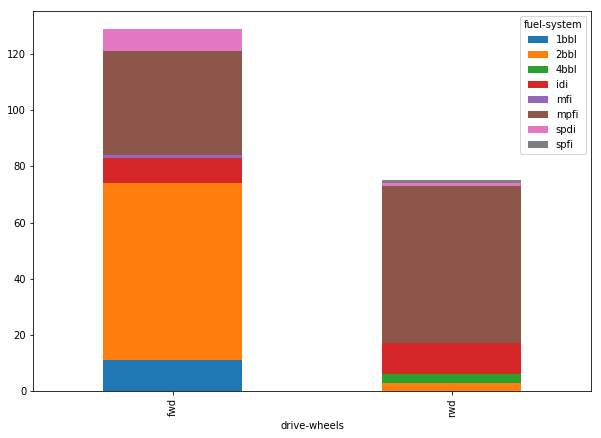

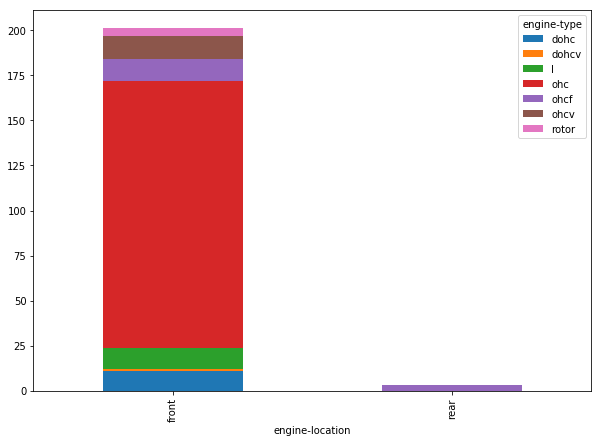

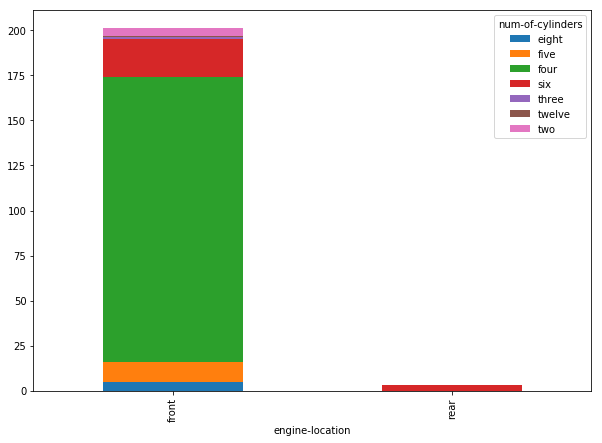

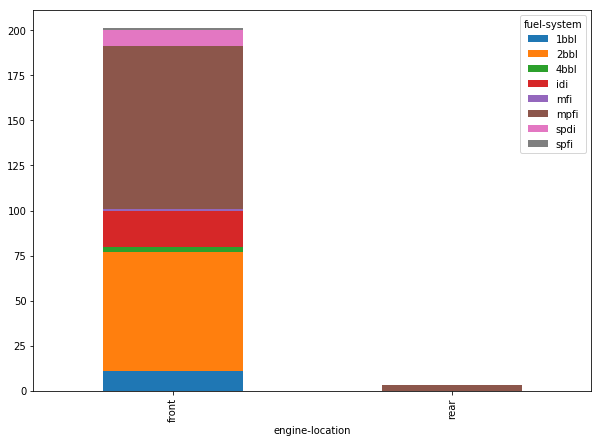

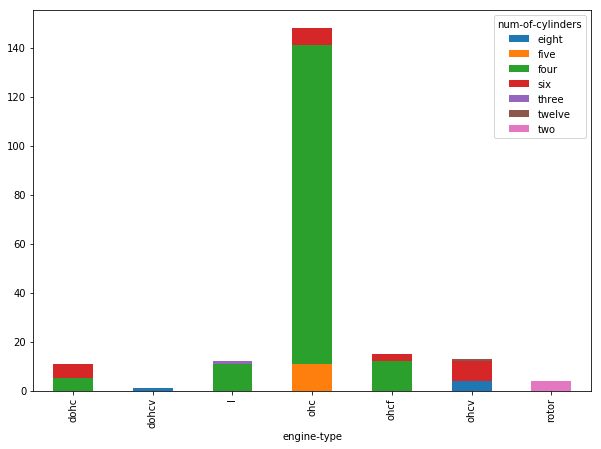

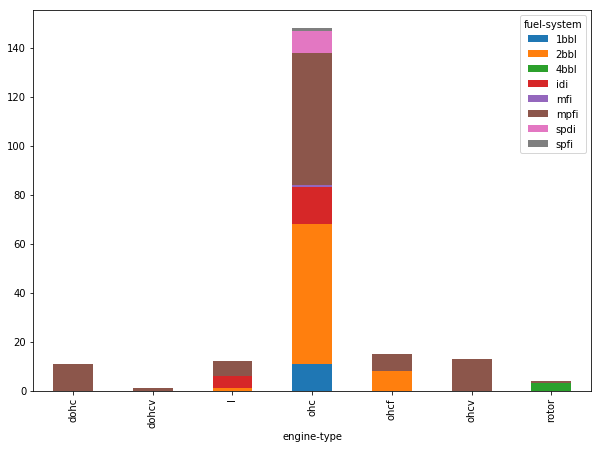

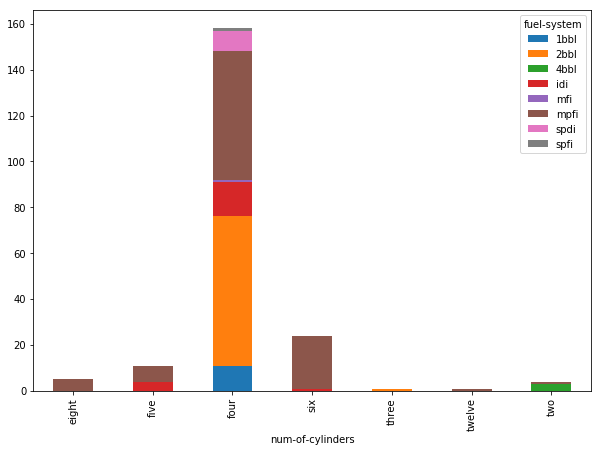

In [588]:
for i in data.columns:
    if(type(data[i][0])==str):
        ch=0
        for j in data.columns:
            if(type(data[j][0])==str):
                if(i==j):
                    ch=1
                elif(ch==1):
                    x=data.groupby([i,j]).size().unstack()
                    x.plot(kind='bar',stacked=True,figsize=(10,7))

The following are the pairs of the categorical predictors that seems to be correlated:
1. aspiration , num-of-doors
2. aspiration , body-style
3. fuel-type , engine-location
4. make , engine-location

But ,since ,"engine-location" and "num-of-doors" are already excluded, so we just need to choose from body style and aspiration 
which one to leave.

## Label Encoding

In order to pass the features to the model for prediction, they must be continuous. So , we use LabelEncoder to encode all the categorical features tp continuous values.

In [589]:
lb = preprocessing.LabelEncoder()

In [590]:
columns=[]
for column in data.columns:
    if(type(data[column][0])==str and column!='num-of-doors' and column!='engine-location' and column!='aspiration'):
        columns.append(column)
        data[column]=lb.fit_transform(data[column])
columns

['make',
 'fuel-type',
 'body-style',
 'drive-wheels',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [543]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161.0,0,1,std,two,0,1,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,161.0,0,1,std,two,2,1,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,1,1,std,four,3,0,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,1,1,std,four,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,161.0,1,1,std,two,3,0,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [592]:
columns_redef=[]
for column in columns:
    if(len(data[column].unique())>2):
        columns_redef.append(column)
columns_redef

['make', 'body-style', 'engine-type', 'num-of-cylinders', 'fuel-system']

## One-Hot Encoding

In some categorical features, where the number of unique values is large ,if we do label encoding then the value which is encoded with a greater number will have greater priority than the value which is encoded by a smaller number. So, we need to do One-Hot Encoding in such cases.

In [593]:
data = pd.get_dummies(data, columns=columns_redef)

In [594]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 70 columns):
symboling             204 non-null int64
normalized-losses     204 non-null float64
fuel-type             204 non-null int64
aspiration            204 non-null object
num-of-doors          204 non-null object
drive-wheels          204 non-null int64
engine-location       204 non-null object
wheel-base            204 non-null float64
length                204 non-null float64
width                 204 non-null float64
height                204 non-null float64
curb-weight           204 non-null int64
engine-size           204 non-null int64
bore                  204 non-null float64
stroke                204 non-null float64
compression-ratio     204 non-null float64
horsepower            204 non-null float64
peak-rpm              204 non-null float64
city-mpg              204 non-null int64
highway-mpg           204 non-null int64
price                 204 non-null float64
make_0   

In [595]:
data.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_0,make_1,make_2,make_3,make_4,make_5,make_6,make_7,make_8,make_9,make_10,make_11,make_12,make_13,make_14,make_15,make_16,make_17,make_18,make_19,make_20,make_21,body-style_0,body-style_1,body-style_2,body-style_3,body-style_4,engine-type_0,engine-type_1,engine-type_2,engine-type_3,engine-type_4,engine-type_5,engine-type_6,num-of-cylinders_0,num-of-cylinders_1,num-of-cylinders_2,num-of-cylinders_3,num-of-cylinders_4,num-of-cylinders_5,num-of-cylinders_6,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,fuel-system_4,fuel-system_5,fuel-system_6,fuel-system_7
0,3,161.0,1,std,two,1,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,161.0,1,std,two,1,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2,164.0,1,std,four,0,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,2,164.0,1,std,four,0,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,161.0,1,std,two,0,front,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## Splitting the dataset into training and testing data for validation

In [596]:
data_x,test_x,data_y,test_y=train_test_split(data[['symboling','normalized-losses','fuel-type','wheel-base',
           'height','bore','stroke','compression-ratio','horsepower','peak-rpm','curb-weight',
           'highway-mpg','make_0','make_1','make_2','make_3','make_4','make_5','make_6','make_7','make_8','make_9',
           'make_10','make_11','make_12','make_13','make_14','make_15','make_16','make_17','make_18','make_19','make_20',
           'make_21','body-style_0','body-style_1','body-style_2','body-style_3','body-style_4','drive-wheels',
           'engine-type_0','engine-type_1','engine-type_2','engine-type_3','engine-type_4',
           'engine-type_5','engine-type_6','num-of-cylinders_0','num-of-cylinders_1','num-of-cylinders_2','num-of-cylinders_3',
           'num-of-cylinders_4','num-of-cylinders_5','num-of-cylinders_6','fuel-system_0','fuel-system_1','fuel-system_2',
           'fuel-system_3','fuel-system_4','fuel-system_5','fuel-system_6','fuel-system_7']],data['price'],test_size=0.20,
            random_state=1)

## Building the model for prediction

In [597]:
linreg=LinearRegression()

linreg.fit(data_x, data_y)
predicted=linreg.predict(X=data_x)
linreg.score(data_x, data_y)

0.9515270875897588

In [598]:
linreg.score(X = test_x ,
                y = test_y)

0.9254278329706035